In [1]:
import mne
import pandas as pd
import numpy as np

In [2]:
# 读取MNE中biosemi电极位置信息
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
print(biosemi_montage.get_positions())
sensor_data = biosemi_montage.get_positions()['ch_pos']
print(sensor_data)
sensor_dataframe = pd.DataFrame(sensor_data).T
sensor_dataframe.to_excel('sensor_dataframe.xlsx')

# 获取的除ch_pos外的信息
'''
'coord_frame': 'unknown', 'nasion': array([ 5.27205792e-18,  8.60992398e-02, -4.01487349e-02]),
'lpa': array([-0.08609924, -0.        , -0.04014873]), 'rpa': array([ 0.08609924,  0.        , -0.04014873]),
'hsp': None, 'hpi': None
'''



{'ch_pos': OrderedDict([('Fp1', array([-0.02933873,  0.09029533, -0.00331545])), ('AF7', array([-0.05580558,  0.0768098 , -0.00331545])), ('AF3', array([-0.03859344,  0.0827639 ,  0.02618555])), ('F1', array([-0.0272617 ,  0.06747508,  0.06106482])), ('F3', array([-0.05177571,  0.06393767,  0.0475    ])), ('F5', array([-0.06925438,  0.06020191,  0.02458781])), ('F7', array([-0.0768098 ,  0.05580558, -0.00331545])), ('FT7', array([-0.09029533,  0.02933873, -0.00331545])), ('FC5', array([-0.08434934,  0.03237868,  0.02935661])), ('FC3', array([-0.06425582,  0.03416543,  0.06106482])), ('FC1', array([-0.0355974 ,  0.0355974 ,  0.08056457])), ('C1', array([-0.03711946, -0.        ,  0.08744796])), ('C3', array([-0.06833728, -0.        ,  0.06599255])), ('C5', array([-0.08869014, -0.        ,  0.03404496])), ('T7', array([-0.09494213, -0.        , -0.00331545])), ('TP7', array([-0.09029533, -0.02933873, -0.00331545])), ('CP5', array([-0.08434934, -0.03237868,  0.02935661])), ('CP3', array([

"\n'coord_frame': 'unknown', 'nasion': array([ 5.27205792e-18,  8.60992398e-02, -4.01487349e-02]),\n'lpa': array([-0.08609924, -0.        , -0.04014873]), 'rpa': array([ 0.08609924,  0.        , -0.04014873]),\n'hsp': None, 'hpi': None\n"

{'FP1': array([-0.0294367,  0.0839171, -0.00699  ]), 'FPZ': array([ 0.0001123,  0.088247 , -0.001713 ]), 'FP2': array([ 0.0298723,  0.0848959, -0.00708  ]), 'AF3': array([-0.0337007,  0.0768371,  0.021227 ]), 'AF4': array([0.0357123, 0.0777259, 0.021956 ]), 'F7': array([-0.0702629,  0.0424743, -0.01142  ]), 'F5': array([-0.0644658,  0.0480353,  0.016921 ]), 'F3': array([-0.0502438,  0.0531112,  0.042192 ]), 'F1': array([-0.0274958,  0.0569311,  0.060342 ]), 'FZ': array([0.0003122, 0.058512 , 0.066462 ]), 'F2': array([0.0295142, 0.0576019, 0.05954  ]), 'F4': array([0.0518362, 0.0543048, 0.040814 ]), 'F6': array([0.0679142, 0.0498297, 0.016367 ]), 'F8': array([ 0.0730431,  0.0444217, -0.012    ]), 'FT7': array([-0.080775 ,  0.0141203, -0.011135 ]), 'FC5': array([-0.0772149,  0.0186433,  0.02446  ]), 'FC3': array([-0.0601819,  0.0227162,  0.055544 ]), 'FC1': array([-0.0340619,  0.0260111,  0.079987 ]), 'FCZ': array([0.0003761, 0.02739  , 0.088668 ]), 'FC2': array([0.0347841, 0.0264379, 0.

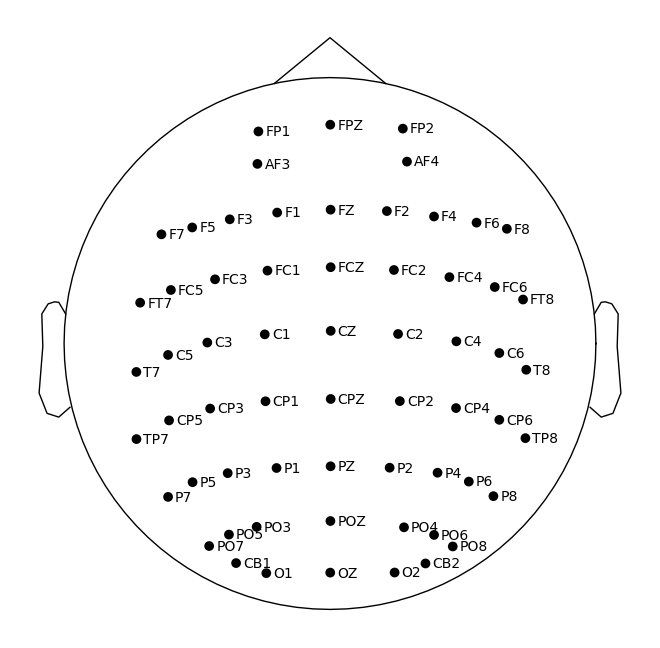

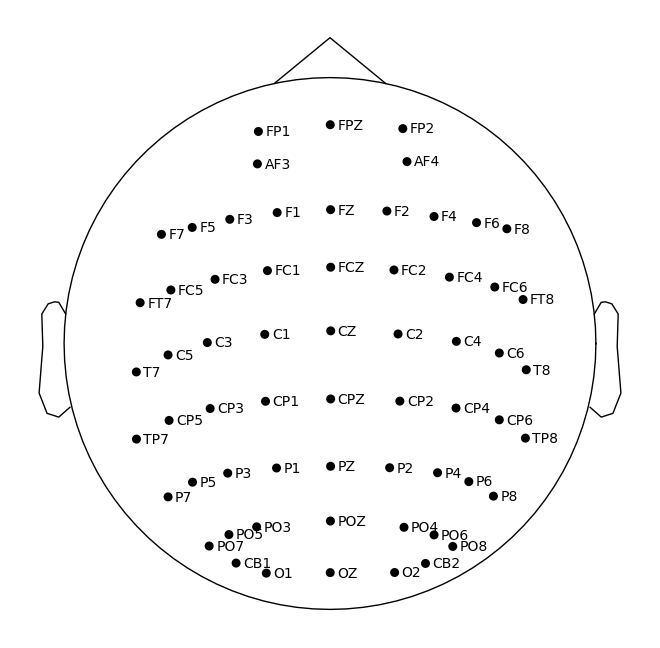

In [3]:
# 将获取的电极位置信息修改并补充缺失的电极位置，整合为1020.xlsx
data1020 = pd.read_excel('D:\p_data\pyText\\1020.xlsx', index_col=0)
channels1020 = np.array(data1020.index)
value1020 = np.array(data1020)

# 将电极通道名称和对应三维坐标位置存储为字典形式
list_dic = dict(zip(channels1020, value1020))
print(list_dic)
# 封装为MNE的格式，参考原biosemi的存储格式
montage_1020 = mne.channels.make_dig_montage(ch_pos=list_dic,
                                             nasion=[5.27205792e-18, 8.60992398e-02, -3.01487349e-02],
                                             lpa=[-0.08609924, -0., -0.04014873],
                                             rpa=[0.08609924, 0., -0.04014873])

# 图示电极位置
montage_1020.plot()

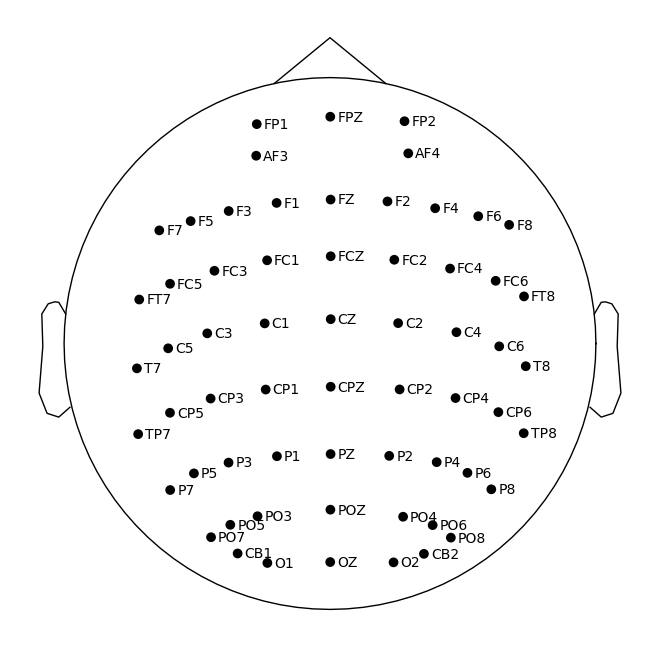

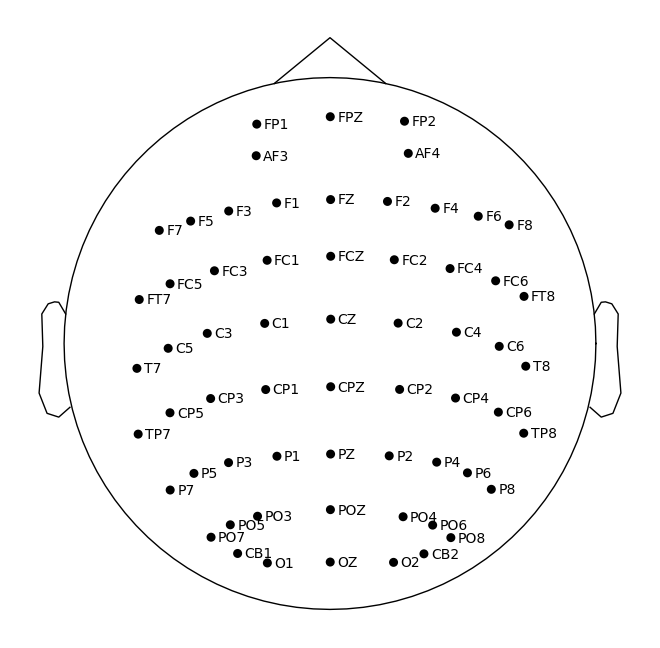

In [4]:
data1020 = pd.read_excel('D:\p_data\pyText\\1020.xlsx', index_col=0)
channels1020 = np.array(data1020.index)
value1020 = np.array(data1020)
list_dic = dict(zip(channels1020, value1020))
montage_1020 = mne.channels.make_dig_montage(ch_pos=list_dic,
                                             nasion=[5.27205792e-18, 6.10992398e-02, -3.01487349e-02],
                                            lpa=[-0.08609924, -0.0, -0.04014873],
                                            rpa=[0.08609924, 0.0, -0.04014873])

# epochs.set_montage(montage_1020)
montage_1020.plot()

In [35]:
import h5py
import numpy as np
with h5py.File('D:\p_data\pyText\\graph_beta_allsub.h5', 'r') as f:
        a = np.array(f['a'])
        b = np.array(f['b'])
        c = np.array(f['c'])
        all = np.array(f['all'])
        f.close()

In [36]:
from torcheeg.datasets.constants.emotion_recognition.seed import SEED_CHANNEL_LIST

In [37]:
a = np.squeeze(a)
print(a.shape)

(62,)


In [38]:
a = np.expand_dims(a,axis=1)
print(a.shape)

(62, 1)


In [39]:
b =  np.squeeze(b)
b = np.expand_dims(b,axis=1)
c =  np.squeeze(c)
c = np.expand_dims(c,axis=1)

In [40]:
all = np.squeeze(all)
print(all.shape)

(62, 3)


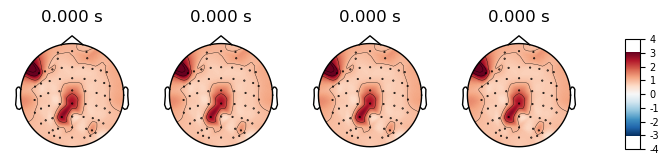

In [34]:

info = mne.create_info(ch_names=SEED_CHANNEL_LIST, sfreq=250.,
                            ch_types='eeg')
#创建evokeds对象                       
evoked = mne.EvokedArray(c/1000000, info)
#evokeds设置通道
evoked.set_montage(montage_1020)

evoked.plot_topomap(units=' ',cbar_fmt='%d',res=400).savefig(fname="./t_c.png",dpi=300)
# mne.viz.plot_topomap(evoked.data[:, 0], evoked.info,colorbar=True ,show=False)
